In [1]:
pip install kaggle torch torchvision matplotlib numpy tqdm


  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached k

In [3]:
import os
import shutil

# Define the source and destination
source_path = r"D:\LAB\kaggle.json"  # Update your actual path
destination_dir = os.path.expanduser("~/.kaggle")

# Create the destination folder if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move the file
shutil.copy(source_path, os.path.join(destination_dir, "kaggle.json"))

# Set correct permissions (important for security)
os.chmod(os.path.join(destination_dir, "kaggle.json"), 0o600)

print("✅ kaggle.json moved successfully!")


✅ kaggle.json moved successfully!


In [4]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
!unzip -q brain-tumor-classification-mri.zip -d mri_dataset


Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT




  0%|          | 0.00/86.8M [00:00<?, ?B/s]
  1%|1         | 1.00M/86.8M [00:01<02:29, 602kB/s]
  2%|2         | 2.00M/86.8M [00:02<01:44, 854kB/s]
  3%|3         | 3.00M/86.8M [00:03<01:30, 976kB/s]
  5%|4         | 4.00M/86.8M [00:04<01:20, 1.08MB/s]
  6%|5         | 5.00M/86.8M [00:05<01:14, 1.15MB/s]
  7%|6         | 6.00M/86.8M [00:05<01:12, 1.17MB/s]
  8%|8         | 7.00M/86.8M [00:07<01:15, 1.11MB/s]
  9%|9         | 8.00M/86.8M [00:07<01:10, 1.17MB/s]
 10%|#         | 9.00M/86.8M [00:08<01:10, 1.16MB/s]
 12%|#1        | 10.0M/86.8M [00:09<01:07, 1.20MB/s]
 13%|#2        | 11.0M/86.8M [00:10<01:04, 1.23MB/s]
 14%|#3        | 12.0M/86.8M [00:11<01:03, 1.24MB/s]
 15%|#4        | 13.0M/86.8M [00:12<01:04, 1.21MB/s]
 16%|#6        | 14.0M/86.8M [00:12<01:01, 1.23MB/s]
 17%|#7        | 15.0M/86.8M [00:13<01:00, 1.24MB/s]
 18%|#8        | 16.0M/86.8M [00:14<00:58, 1.26MB/s]
 20%|#9        | 17.0M/86.8M [00:15<00:57, 1.27MB/s]
 21%|##        | 18.0M/86.8M [00:16<00:56, 1.27MB/s]
 22%

In [5]:
import zipfile
import os

# Define paths using raw strings to avoid escape sequence issues
zip_path = r"D:\LAB\brain-tumor-classification-mri.zip"
extract_path = r"D:\LAB\mri_dataset"

# Ensure extraction folder exists
os.makedirs(extract_path, exist_ok=True)

# Check if the ZIP file exists before extraction
if not os.path.exists(zip_path):
    print("❌ ZIP file not found! Please check the file path:", zip_path)
else:
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print("✅ Dataset extracted successfully at:", extract_path)
    except zipfile.BadZipFile:
        print("❌ Error: The ZIP file is corrupted or not a valid ZIP archive.")
    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")


✅ Dataset extracted successfully at: D:\LAB\mri_dataset


In [6]:
import torch

# Check if CUDA (GPU) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")  # Output: 'cuda' if GPU is available


✅ Using device: cuda


In [7]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Define dataset paths (Updated to match your folder structure)
data_dir = r"D:\LAB\mri_dataset"
train_path = os.path.join(data_dir, "Training")  # Was "train", now "Training"
val_path = os.path.join(data_dir, "Testing")  # Was "val", now "Testing"

# Check if dataset exists before loading
if not os.path.exists(train_path) or not os.path.exists(val_path):
    print("❌ Dataset folders not found! Please check extraction.")
else:
    # Load datasets
    train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
    val_dataset = datasets.ImageFolder(root=val_path, transform=transform)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    print(f"✅ Dataset loaded: {len(train_dataset)} training samples, {len(val_dataset)} validation samples")


✅ Using device: cuda
✅ Dataset loaded: 2870 training samples, 394 validation samples


In [8]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models

# Define the AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num_classes):
        super(AlexNet, self).__init__()
        self.model = models.alexnet(pretrained=True)  # Load pre-trained AlexNet
        self.model.classifier[6] = nn.Linear(4096, num_classes)  # Modify output layer

    def forward(self, x):
        return self.model(x)

# Get the number of classes dynamically from the dataset
num_classes = len(train_dataset.classes)

# Initialize the model and move it to GPU if available
model = AlexNet(num_classes).to(device)
print("✅ AlexNet model initialized successfully!")


C:\Windows\System32\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Windows\System32\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ AlexNet model initialized successfully!


In [9]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print("✅ Loss function and optimizer set!")


✅ Loss function and optimizer set!


In [10]:
# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        
        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

    print("✅ Training completed!")

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=10)


Epoch [1/10], Loss: 0.5266, Accuracy: 78.89%
Epoch [2/10], Loss: 0.2310, Accuracy: 91.67%
Epoch [3/10], Loss: 0.1367, Accuracy: 94.98%
Epoch [4/10], Loss: 0.0854, Accuracy: 96.90%
Epoch [5/10], Loss: 0.0464, Accuracy: 97.94%
Epoch [6/10], Loss: 0.0468, Accuracy: 98.33%
Epoch [7/10], Loss: 0.0278, Accuracy: 99.13%
Epoch [8/10], Loss: 0.0300, Accuracy: 98.92%
Epoch [9/10], Loss: 0.0366, Accuracy: 98.75%
Epoch [10/10], Loss: 0.0070, Accuracy: 99.83%
✅ Training completed!


In [11]:
# Function to evaluate the model
def evaluate_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"✅ Model Accuracy on Test Set: {accuracy:.2f}%")

# Evaluate model performance
evaluate_model(model, val_loader)


✅ Model Accuracy on Test Set: 74.37%


In [12]:
# Save the trained model
torch.save(model.state_dict(), "alexnet_mri.pth")
print("✅ Model saved successfully as 'alexnet_mri.pth'!")


✅ Model saved successfully as 'alexnet_mri.pth'!


Epoch [1/10], Loss: 0.0026, Accuracy: 99.90%
Epoch [2/10], Loss: 0.0075, Accuracy: 99.83%
Epoch [3/10], Loss: 0.0298, Accuracy: 99.20%
Epoch [4/10], Loss: 0.0207, Accuracy: 99.41%
Epoch [5/10], Loss: 0.0348, Accuracy: 98.99%
Epoch [6/10], Loss: 0.0450, Accuracy: 98.78%
Epoch [7/10], Loss: 0.0117, Accuracy: 99.65%
Epoch [8/10], Loss: 0.0037, Accuracy: 99.90%
Epoch [9/10], Loss: 0.0161, Accuracy: 99.51%
Epoch [10/10], Loss: 0.0045, Accuracy: 99.90%


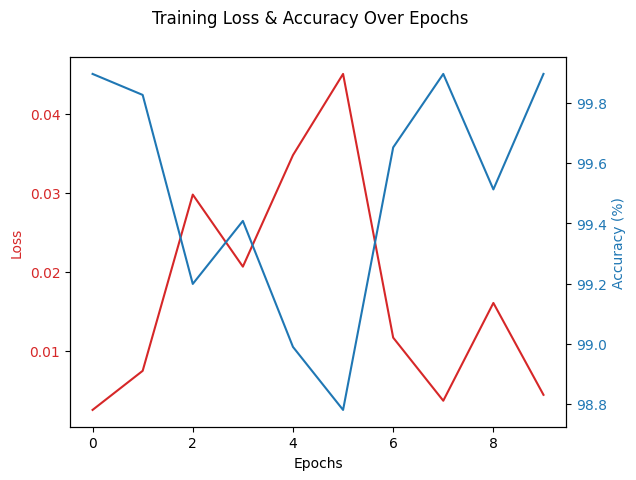

In [13]:
import matplotlib.pyplot as plt

# Store loss and accuracy values
train_losses = []
train_accuracies = []

# Modify the training function to store values
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

# Train model and store values
train_model(model, train_loader, criterion, optimizer, num_epochs=10)

# Plot Loss and Accuracy
fig, ax1 = plt.subplots()

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss", color="tab:red")
ax1.plot(train_losses, color="tab:red", label="Training Loss")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.set_ylabel("Accuracy (%)", color="tab:blue")
ax2.plot(train_accuracies, color="tab:blue", label="Training Accuracy")
ax2.tick_params(axis="y", labelcolor="tab:blue")

fig.suptitle("Training Loss & Accuracy Over Epochs")
plt.show()


In [15]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [17]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


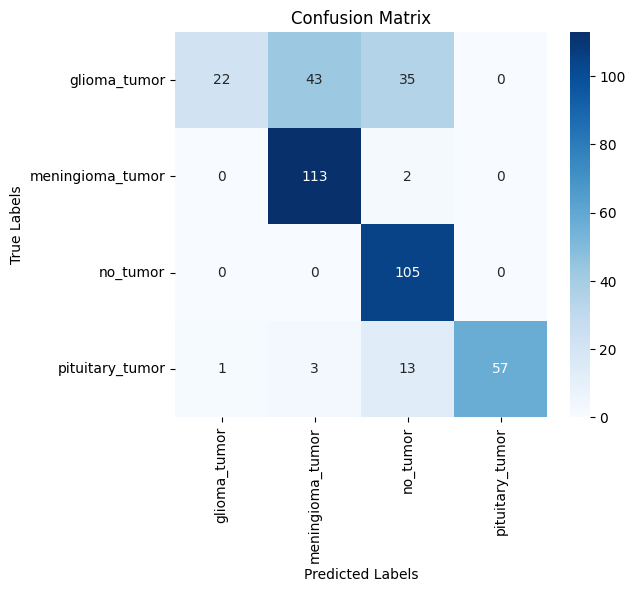

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to generate confusion matrix
def plot_confusion_matrix(model, val_loader, class_names):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Generate confusion matrix
plot_confusion_matrix(model, val_loader, train_dataset.classes)


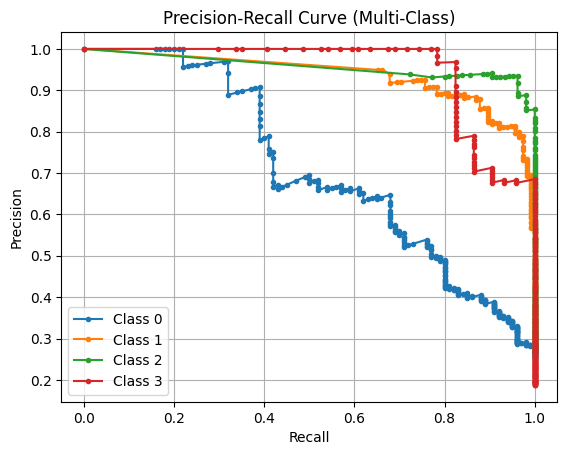

In [20]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(model, val_loader, num_classes):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            if num_classes == 2:  
                # Binary classification: Use sigmoid activation
                probabilities = torch.sigmoid(outputs[:, 0])  
            else:
                # Multi-class classification: Use softmax
                probabilities = torch.nn.functional.softmax(outputs, dim=1)

            y_scores.extend(probabilities.cpu().numpy())  
            y_true.extend(labels.cpu().numpy())

    if num_classes == 2:
        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        plt.figure(figsize=(6, 5))
        plt.plot(recall, precision, marker=".")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("Precision-Recall Curve (Binary)")
        plt.grid()
        plt.show()
    else:
        # For multi-class: Generate Precision-Recall curve for each class
        for i in range(num_classes):
            precision, recall, _ = precision_recall_curve(
                [1 if label == i else 0 for label in y_true],  
                [score[i] for score in y_scores]
            )
            plt.plot(recall, precision, marker=".", label=f"Class {i}")

        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("Precision-Recall Curve (Multi-Class)")
        plt.legend()
        plt.grid()
        plt.show()

# Example usage:
num_classes = len(train_dataset.classes)  # Auto-detect number of classes
plot_precision_recall_curve(model, val_loader, num_classes)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.8025708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.8112855].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.5498476].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7851416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7851416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Cl

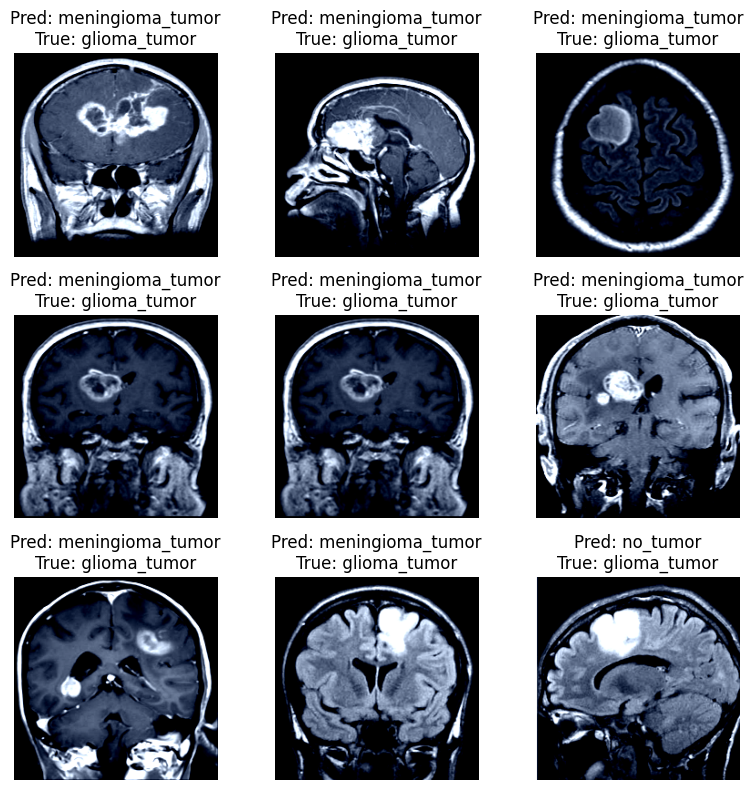

In [21]:
import random

# Function to display images with predicted labels
def show_predictions(model, val_loader, class_names):
    model.eval()
    images, labels = next(iter(val_loader))
    images, labels = images.to(device), labels.to(device)

    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = img * 0.5 + 0.5  # Unnormalize
        ax.imshow(img)
        ax.set_title(f"Pred: {class_names[predicted[i].item()]}\nTrue: {class_names[labels[i].item()]}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Show predictions on test images
show_predictions(model, val_loader, train_dataset.classes)
